In [1]:
## Import Common Package
## Kasus Regresi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Import Data

In [5]:
df = pd.read_csv('carprice.csv')
df.head()

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [6]:
df.isna().sum()

ID                     0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

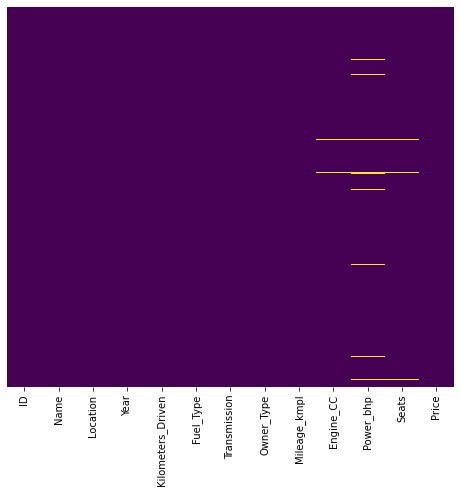

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

In [11]:
carDesc = []
for i in df.columns:
    carDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=carDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,ID,int64,0,0.00,5953,"[2711, 3829]"
1,Name,object,0,0.00,1849,[Volkswagen Vento 1.5 Highline Plus AT 16 Allo...
2,Location,object,0,0.00,11,"[Ahmedabad, Kochi]"
3,Year,int64,0,0.00,22,"[2009, 2001]"
4,Kilometers_Driven,int64,0,0.00,3062,"[44285, 9900]"
5,Fuel_Type,object,0,0.00,3,"[Petrol, Diesel]"
6,Transmission,object,0,0.00,2,"[Automatic, Manual]"
7,Owner_Type,object,0,0.00,4,"[Third, Second]"
8,Mileage_kmpl,float64,2,0.03,418,"[12.3, 16.02]"
9,Engine_CC,float64,36,0.60,146,"[1248.0, 1595.0]"


In [12]:
### Handling Missing Value

In [13]:
df['Mileage_kmpl'] = df['Mileage_kmpl'].fillna(df['Mileage_kmpl'].mean())

In [14]:
df['Engine_CC'] = df['Engine_CC'].fillna(df['Engine_CC'].mean())

In [16]:
df['Power_bhp'] = df['Power_bhp'].fillna(df['Power_bhp'].mean())

In [18]:
df['Seats'] = df['Seats'].fillna(df['Seats'].mode())

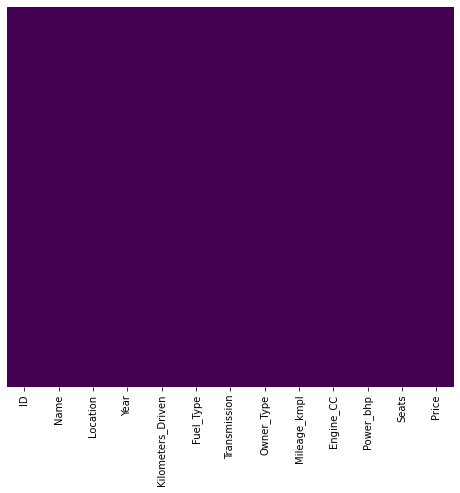

In [19]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

In [20]:
df_1 = df.drop(columns=['ID', 'Name'])
df_1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [21]:
df_1['Location'].value_counts()

Mumbai        772
Hyderabad     733
Kochi         643
Coimbatore    636
Pune          608
Delhi         544
Kolkata       535
Chennai       492
Jaipur        411
Bangalore     358
Ahmedabad     221
Name: Location, dtype: int64

In [22]:
#### Seleksi Feature via EDA

In [23]:
pd.crosstab(index=df['Location'], columns='Avg Price', values=df['Price'], aggfunc='mean')

col_0,Avg Price
Location,
Ahmedabad,8.531312
Bangalore,13.328631
Chennai,7.768476
Coimbatore,15.078223
Delhi,9.830846
Hyderabad,9.864393
Jaipur,5.825036
Kochi,11.264852
Kolkata,5.661215


In [24]:
## Encoding

In [25]:
df_1 = pd.get_dummies(data=df_1, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])

In [27]:
df_1.corr()['Price']

Year                         0.306539
Kilometers_Driven           -0.011548
Mileage_kmpl                -0.304743
Engine_CC                    0.655976
Power_bhp                    0.766876
Seats                        0.049874
Price                        1.000000
Location_Ahmedabad          -0.017766
Location_Bangalore           0.085180
Location_Chennai            -0.047548
Location_Coimbatore          0.170350
Location_Delhi               0.008008
Location_Hyderabad           0.010581
Location_Jaipur             -0.090270
Location_Kochi               0.053225
Location_Kolkata            -0.108748
Location_Mumbai              0.000320
Location_Pune               -0.082053
Fuel_Type_Diesel             0.316729
Fuel_Type_Electric           0.005433
Fuel_Type_Petrol            -0.316945
Transmission_Automatic       0.584504
Transmission_Manual         -0.584504
Owner_Type_First             0.091836
Owner_Type_Fourth & Above   -0.021718
Owner_Type_Second           -0.073427
Owner_Type_T

In [28]:
## Seleksi Location - Optional via Encoding

In [29]:
df_2 = pd.get_dummies(data=df, columns=['Location'])

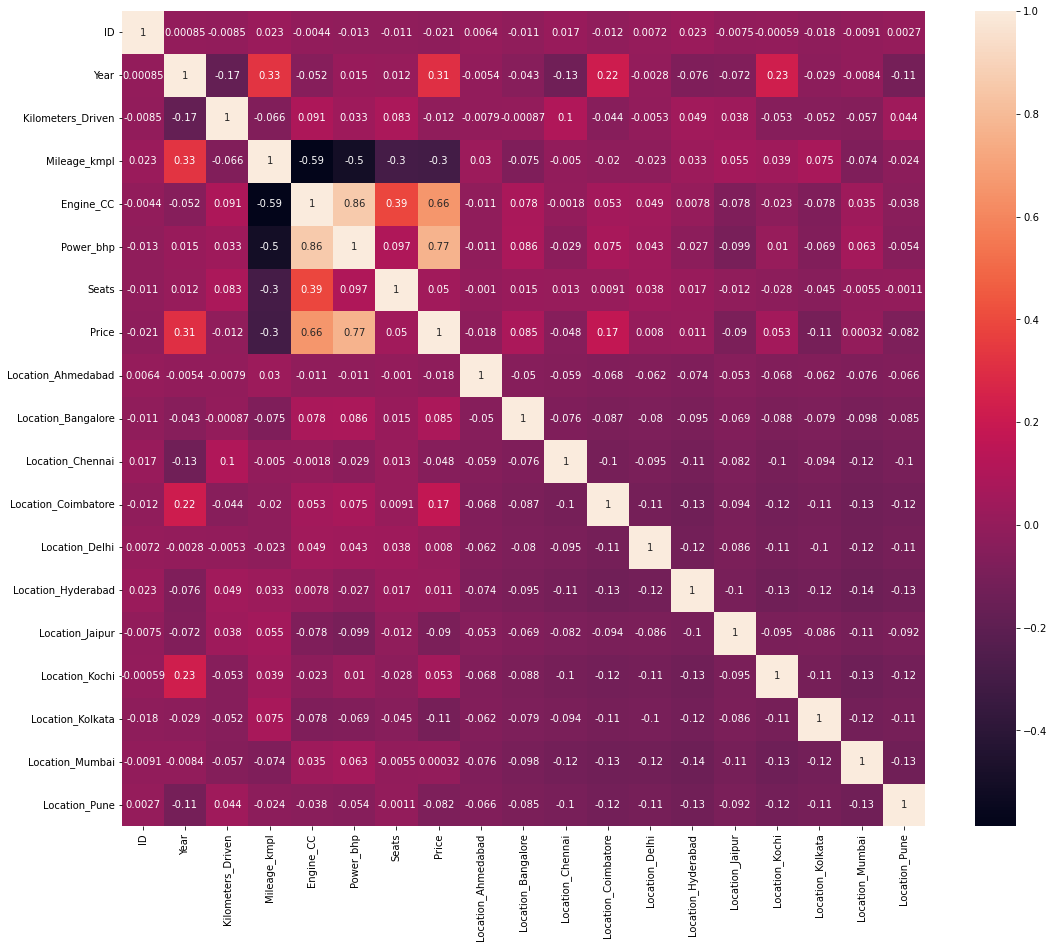

In [34]:
plt.figure(figsize=(18,15))
sns.heatmap(df_2.corr(), annot=True)
plt.show()

In [37]:
df_2.corr()[['Price']].sort_values('Price', ascending=False)

,Price
Price,1.000000
Power_bhp,0.766876
Engine_CC,0.655976
Year,0.306539
Location_Coimbatore,0.170350
Location_Bangalore,0.085180
Location_Kochi,0.053225
Seats,0.049874
Location_Hyderabad,0.010581
Location_Delhi,0.008008


In [38]:
## Machine Learning Modelling

In [39]:
## Splitting Data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_1.drop(columns='Price')
y = df_1['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=42) 

In [43]:
X_train.head()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4329,2016,60913,20.73,1373.0,91.100000,5.0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
2644,2017,40459,19.67,1582.0,126.200000,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
642,2004,200000,0.00,1086.0,113.803144,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5901,2018,1048,18.90,998.0,67.100000,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2177,2013,96000,23.50,1498.0,90.000000,5.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [44]:
X_train.shape

(4762, 26)

In [45]:
X_test.head()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4040,2018,35442,17.30,1497.0,117.3,7.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4248,2011,75000,17.20,1968.0,138.1,5.0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1966,2014,48000,22.69,1995.0,190.0,5.0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4766,2009,110000,11.70,2993.0,245.0,5.0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1374,2010,69009,15.60,1196.0,70.0,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [46]:
### Modelling

In [47]:
### Base Model

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC
## SVR => untuk Regresi
## SVR => untuk Klasifikasi

In [50]:
KNN_1 = KNeighborsRegressor()

In [51]:
KNN_1.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
SVM_1 = SVR()

In [53]:
SVM_1.fit(X_train, y_train)

SVR()

In [54]:
### Evaluation Matrix

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [56]:
def Eva_Matrix_DF(Model,X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

In [57]:
df_KNN = Eva_Matrix_DF(KNN_1, X_train, X_test, y_train, y_test, 'KNN')

In [58]:
df_KNN

,TrainingKNN,TestingKNN
R2,0.729540,0.529352
MAE,3.224958,4.072930
MSE,33.152769,65.962398
RMSE,5.757844,8.121724


In [59]:
df_SVM = Eva_Matrix_DF(SVM_1, X_train, X_test, y_train, y_test, 'KNN')

In [60]:
df_SVM

,TrainingKNN,TestingKNN
R2,-0.078944,-0.066117
MAE,5.916541,5.983470
MSE,132.256143,149.418760
RMSE,11.500267,12.223697


In [61]:
## Improvement

In [62]:
## Feature Engineering

In [63]:
df.head()

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [64]:
## df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])

In [65]:
df_3 = df.drop(columns=['ID', 'Name'])

In [66]:
df_3.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [67]:
num_col = df_3[['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']]

In [68]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [69]:
sc = RobustScaler()

In [71]:
sc_df = sc.fit_transform(num_col)

In [72]:
df_sc = pd.DataFrame(sc_df)

In [73]:
df_Full = pd.concat([df_3, df_sc], axis=1)

In [74]:
df_Full.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,0,1,2,3,4,5
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.2,-0.307692,0.261824,0.109415,0.466216,0.0
1,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,-0.6,-0.179487,0.013514,-0.377863,-0.167230,0.0
2,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,-0.4,0.871795,0.447635,-0.315522,-0.166216,2.0
3,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,-0.2,-0.316154,-0.493243,0.600509,0.712838,0.0
4,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,-0.2,0.871769,0.837838,-0.044529,-0.599662,0.0


In [75]:
df_Full.drop(columns=['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats'], inplace=True)

In [76]:
df_Full['Transmission'] = df_Full['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

In [77]:
df_Full = pd.get_dummies(df_Full, columns=['Location', 'Fuel_Type', 'Owner_Type'])

In [78]:
df_Full.head()

,Transmission,Price,0,1,2,3,4,5,Location_Ahmedabad,Location_Bangalore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,12.50,0.2,-0.307692,0.261824,0.109415,0.466216,0.0,0,0,...,0,0,1,1,0,0,1,0,0,0
1,0,4.50,-0.6,-0.179487,0.013514,-0.377863,-0.167230,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,6.00,-0.4,0.871795,0.447635,-0.315522,-0.166216,2.0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,17.74,-0.2,-0.316154,-0.493243,0.600509,0.712838,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,3.50,-0.2,0.871769,0.837838,-0.044529,-0.599662,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [79]:
### Splitting Data

In [80]:
X_2 = df_Full.drop(columns='Price')
y_2 = df_Full['Price']

In [86]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_2, y_2, train_size= .80, random_state = 42)

In [87]:
### Modelling

In [88]:
KNN_scaled = KNeighborsRegressor()

In [89]:
KNN_scaled.fit(X_train_sc, y_train_sc)

KNeighborsRegressor()

In [90]:
SVM_scaled = SVR()

In [91]:
SVM_scaled.fit(X_train_sc, y_train_sc)

SVR()

In [92]:
### Evaluation Matrix

In [93]:
### KNN Scaled

In [94]:
df_KNN2 = Eva_Matrix_DF(KNN_scaled, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'KNN Scaled')

In [95]:
df_KNN2

,TrainingKNN Scaled,TestingKNN Scaled
R2,0.874951,0.774915
MAE,1.861480,2.383498
MSE,15.328361,31.546141
RMSE,3.915145,5.616595


In [96]:
df_SVM2 = Eva_Matrix_DF(SVM_scaled, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'SVM Scaled')

In [97]:
df_SVM2

,TrainingSVM Scaled,TestingSVM Scaled
R2,0.779618,0.760531
MAE,2.117271,2.225148
MSE,27.014291,33.562192
RMSE,5.197527,5.793289
